In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# **Data preprocessing**

 Let's load the data and take a first look at it.
 We already have a test and train split provided by kaggle.

In [ ]:
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
df_test = pd.read_csv('test.csv')
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


Let's make some copies just in case.

In [ ]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [ ]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [ ]:
display(df_train_copy)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## Facts about the dataset

### Train set

We can see that we have missing values in every row except the 'ID' and the 'Transported' row.

In [ ]:
df_train_copy.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


From the info table we can see that we have object and float data types. And we can also see her again that we have a few missing values in some rows.

In [ ]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df_train_copy.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Test set

Also in the Test set we have a few missing values. And of course the same data types. The inly difference - we do not have the Transported column, because that's the one we want to predict.

In [ ]:
df_test_copy.isnull().sum()

,0
PassengerId,0
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98


In [ ]:
df_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


## Drop columns

### Train set

For now we can already say that we don't need the PassengerId and Name column for the training and the prediction. So we drop them (train and test set).

In [ ]:
df_train_copy = df_train_copy.drop(['PassengerId', 'Name'], axis = 1)
df_train_copy

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


### Test set

In [ ]:
df_test_copy = df_test_copy.drop(['PassengerId', 'Name'], axis = 1)
df_test_copy

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0


## 'Cabin' Column

We going to take a closer look into the 'Cabin' column. At first sight it seems random and not like it could provide any valuable information. But let's split it into Deck, Position and Side.

## Split Cabin in Deck, Position, Sie

In [ ]:
df_train_copy[['Deck', 'Position', 'Side']] = df_train_copy['Cabin'].str.split('/', expand=True)

df_test_copy[['Deck', 'Position', 'Side']] = df_test_copy['Cabin'].str.split('/', expand=True)

In [ ]:
df_train_copy.drop(['Cabin'], axis = 1, inplace=True)
df_test_copy.drop(['Cabin'], axis = 1, inplace=True)

In [ ]:
df_train_copy

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Position,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


Okay nice, now let's take a close look at the values.

In [ ]:
df_train_copy['Deck'].value_counts()

,count
Deck,
F,2794
G,2559
E,876
B,779
C,747
D,478
A,256
T,5


In [ ]:
df_train_copy['Position'].value_counts()

,count
Position,
82,28
86,22
19,22
56,21
176,21
...,...
1644,1
1515,1
1639,1


In [ ]:
df_train_copy['Side'].value_counts()

,count
Side,
S,4288
P,4206


Okay we have a lot of different values here. I am not sure about the position column but I assume it does not have a huge impact here. Side and Deck on the other hand could be important for the prediction.

### Drop 'Position' column

In [ ]:
df_train_copy.drop(['Position'], axis = 1, inplace=True)
df_test_copy.drop(['Position'], axis = 1, inplace=True)

In [ ]:
df_train_copy.isnull().sum()

,0
HomePlanet,201
CryoSleep,217
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208
Spa,183
VRDeck,188


In [ ]:
df_test_copy.isnull().sum()

,0
HomePlanet,87
CryoSleep,93
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98
Spa,101
VRDeck,80


In [ ]:
df_train_copy.columns.values

array(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'Deck', 'Side'], dtype=object)

In [ ]:
column_reorder_train = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
                  'Deck', 'Side', 'RoomService', 'FoodCourt', 'ShoppingMall',
                  'Spa', 'VRDeck', 'Transported',]

df_train_copy = df_train_copy[column_reorder_train]

In [ ]:
df_test_copy.columns.values

array(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Deck', 'Side'], dtype=object)

In [ ]:
column_reorder_test = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
                  'Deck', 'Side', 'RoomService', 'FoodCourt', 'ShoppingMall',
                  'Spa', 'VRDeck',]

df_test_copy = df_test_copy[column_reorder_test]

In [ ]:
df_train_copy.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Deck,Side,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,B,P,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,F,S,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,A,S,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,A,S,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,F,S,303.0,70.0,151.0,565.0,2.0,True


## Check for an imbalanced train dataset

Let's check now if our dataset is balanced.

In [ ]:
df_train_copy['Transported'].value_counts()

,count
Transported,
True,4378
False,4315


There are only 63 more True than False. That is okay for our model and should not cause any problems.

## Checkpoint

In [ ]:
train_data_processed = df_train_copy.copy()
test_data_processed = df_test_copy.copy()

## Handling missing values

So let's see what we can do about the missing values.

In [ ]:
train_data_processed

,HomePlanet,CryoSleep,Destination,Age,VIP,Deck,Side,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,B,P,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,F,S,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,A,S,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,A,S,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,F,S,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,A,P,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18.0,False,G,S,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26.0,False,G,S,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32.0,False,E,S,0.0,1049.0,0.0,353.0,3235.0,False


In [ ]:
train_data_processed.isnull().sum()

,0
HomePlanet,201
CryoSleep,217
Destination,182
Age,179
VIP,203
Deck,199
Side,199
RoomService,181
FoodCourt,183
ShoppingMall,208


### HomePlanet and Destination

In [ ]:
train_data_processed['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [ ]:
train_data_processed['Destination'].value_counts()

,count
Destination,
TRAPPIST-1e,5915
55 Cancri e,1800
PSO J318.5-22,796


In [ ]:
train_data_processed['Destination'].mode()

,Destination
0,TRAPPIST-1e


In [ ]:
train_data_processed['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [ ]:
train_data_processed['HomePlanet'].value_counts()

,count
HomePlanet,
Earth,4602
Europa,2131
Mars,1759


In [ ]:
train_data_processed['HomePlanet'].mode()

,HomePlanet
0,Earth


Planet **Earth** is the most frequent planet and **TRAPPIST-1e** the most frequent Destination so I decided to fill the missing **201** Planet values with Earth and the **182** Destination values with TRAPPIST-1e.

In [ ]:
train_data_processed['HomePlanet'] = train_data_processed['HomePlanet'].fillna(train_data_processed['HomePlanet'].mode()[0])
test_data_processed['HomePlanet'] = test_data_processed['HomePlanet'].fillna(test_data_processed['HomePlanet'].mode()[0])

In [ ]:
train_data_processed['Destination'] = train_data_processed['Destination'].fillna(train_data_processed['HomePlanet'].mode()[0])
test_data_processed['Destination'] = test_data_processed['Destination'].fillna(test_data_processed['HomePlanet'].mode()[0])

### Age

In [ ]:
train_data_processed['Age'].unique()

array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
       48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
       47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., nan, 25., 38.,
       36., 22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64.,
       67., 61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5.,
       79., 68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66.,
       69., 72., 77.])

In [ ]:
train_data_processed['Age'].median()

27.0

In [ ]:
train_data_processed['Age'].mode()

,Age
0,24.0


So here we can see the median of Age is 27 years and the mode in 24 years, so I will replace the missing values with the median.

In [ ]:
train_data_processed['Age'] = train_data_processed['Age'].fillna(train_data_processed['Age'].median())
test_data_processed['Age'] = test_data_processed['Age'].fillna(test_data_processed['Age'].median())

### CyroSleep, VIP

Here we have just to categories, False or True. We could fill the missing values with the most frequent value.

In [ ]:
train_data_processed['CryoSleep'].value_counts()

,count
CryoSleep,
False,5439
True,3037


In [ ]:
train_data_processed['VIP'].value_counts()

,count
VIP,
False,8291
True,199


#### CyroSleep

I assume that people who are in sleep do not have any spendings. So I will fill the missing values with True where all spendings are 0. The rest I will fill with False becaue it is the most frequent value.

In [ ]:
train_data_processed['CryoSleep'] = train_data_processed.apply(
    lambda row: True if pd.isna(row['CryoSleep']) and
    row['RoomService'] == 0 and
    row['FoodCourt'] == 0 and
    row['ShoppingMall'] == 0 and
    row['Spa'] == 0 and
    row['VRDeck'] == 0 else row['CryoSleep'], axis = 1
)

In [ ]:
train_data_processed['CryoSleep'] = train_data_processed['CryoSleep'].fillna(False)

<ipython-input-47-eaf39fb63d3c>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data_processed['CryoSleep'] = train_data_processed['CryoSleep'].fillna(False)


In [ ]:
test_data_processed['CryoSleep'] = test_data_processed.apply(
    lambda row: True if pd.isna(row['CryoSleep']) and
    row['RoomService'] == 0 and
    row['FoodCourt'] == 0 and
    row['ShoppingMall'] == 0 and
    row['Spa'] == 0 and
    row['VRDeck'] == 0 else row['CryoSleep'], axis = 1
)

test_data_processed['CryoSleep'] = test_data_processed['CryoSleep'].fillna(False)

<ipython-input-48-a9d837d409c6>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data_processed['CryoSleep'] = test_data_processed['CryoSleep'].fillna(False)


#### VIP

So there could be a relation between the VIP Status and the Deck which the person is living in but I can not say for sure which Deck is the better one. So in this case I think it's highly unlikely that more people have a VIP Status so I place the missing values with False.

In [ ]:
train_data_processed['VIP'] = train_data_processed['VIP'].fillna(False)

<ipython-input-49-393b5513c933>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data_processed['VIP'] = train_data_processed['VIP'].fillna(False)


In [ ]:
test_data_processed['VIP'] = test_data_processed['VIP'].fillna(False)

<ipython-input-50-5dddf70dc38f>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data_processed['VIP'] = test_data_processed['VIP'].fillna(False)


### Spendings (FoodCourt, Spa, VRDeck, RoomService)

In [ ]:
spending_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [ ]:
for column in spending_columns:
  train_data_processed.loc[(train_data_processed['CryoSleep'] == True) &
   (train_data_processed[column].isna()), column] = 0

  train_data_processed.loc[(train_data_processed['CryoSleep'] == False) &
   (train_data_processed[column].isna()), column] = train_data_processed[column].mean()

In [ ]:
for column in spending_columns:
  test_data_processed.loc[(test_data_processed['CryoSleep'] == True) &
   (test_data_processed[column].isna()), column] = 0

  test_data_processed.loc[(test_data_processed['CryoSleep'] == False) &
   (test_data_processed[column].isna()), column] = test_data_processed[column].mean()

### Deck, Side

In [ ]:
for column in ['Deck', 'Side']:
  train_data_processed[column] = train_data_processed[column].fillna(train_data_processed[column].mode()[0])
  test_data_processed[column] = test_data_processed[column].fillna(test_data_processed[column].mode()[0])

## Final Check

Let's check if we did everything right and filled all mssing values.

In [ ]:
train_data_processed.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
Deck,0
Side,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [ ]:
test_data_processed.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
Deck,0
Side,0
RoomService,0
FoodCourt,0
ShoppingMall,0


 Awesome! No missing values!

# Save preprocessed Data in a csv file

In [ ]:
train_data_processed.to_csv('preprocessed_train_data')
test_data_processed.to_csv('preprocessed_test_data')

# **Build the Model**

Let's load our preprocessed data.

In [ ]:
train_data = pd.read_csv('preprocessed_train_data')
test_data = pd.read_csv('preprocessed_test_data')

In [ ]:
test_data = test_data.drop(['Unnamed: 0'], axis = 1)

In [ ]:
train_data = train_data.drop(['Unnamed: 0'], axis = 1)


In [ ]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Deck,Side,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,B,P,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,F,S,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,A,S,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,A,S,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,F,S,303.0,70.0,151.0,565.0,2.0,True


## Get dummies and standardize the data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

### Target variable 'Transported'

In [ ]:
label_encoder = LabelEncoder()

train_data['Transported'] = label_encoder.fit_transform(train_data['Transported'])

In [ ]:
train_data['Transported']

,Transported
0,0
1,1
2,0
3,0
4,1
...,...
8688,0
8689,0
8690,1
8691,0


### Categorical variables

I create dummies and standardize the categorical data with the pipeline from sklearn.

In [ ]:
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck',
                        'Side']
numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
                    'VRDeck']

In [ ]:
preprocessor = ColumnTransformer(transformers=[('cat',
                                                    OneHotEncoder(drop='first'),
                                                    categorical_features),
                                               ('num', StandardScaler(),
                                               numeric_features)
],
                                       remainder='passthrough'
)

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [ ]:
X = train_data.iloc[:, :-1] # input variables
y = train_data.iloc[:, -1] # target variable

In [ ]:
train_data_transformed = pipeline.fit_transform(X)
test_data_transformes = pipeline.transform(test_data)

In [ ]:
train_data_transformed

array([[ 1.        ,  0.        ,  0.        , ..., -0.28743081,
        -0.27448832, -0.26700729],
       [ 0.        ,  0.        ,  0.        , ..., -0.24560093,
         0.21354182, -0.22818892],
       [ 1.        ,  0.        ,  0.        , ..., -0.28743081,
         5.69476923, -0.22377775],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  2.84479077,
        -0.27359938, -0.26700729],
       [ 1.        ,  0.        ,  0.        , ..., -0.28743081,
         0.03930884,  2.58702462],
       [ 1.        ,  0.        ,  0.        , ..., -0.28743081,
        -0.27448832, -0.25642046]])

I created dummies for the categorical variables and standardized just the numerical variables.

## Split Train data in Train and Validation set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_data_transformed, y, train_size=0.8,
                                                  random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(6954, 21)
(6954,)


In [ ]:
print(X_val.shape)
print(y_val.shape)

(1739, 21)
(1739,)


## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logreg.score(X_train, y_train)

0.7950819672131147

In [ ]:
base_model_predictions = logreg.predict(X_val)

accuracy_base_model = accuracy_score(y_val, base_model_predictions)
print('Accuracy Logistic Regression (Basic):', accuracy_base_model)

Accuracy Logistic Regression (Basic): 0.78205865439908


### Finetuning the model with GridSearch and Cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [ ]:
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7962348913105318


In [ ]:
best_logreg = grid_search.best_estimator_

### Confuison Matrix and Accuracy Score

In [ ]:
val_predictions = best_logreg.predict(X_val)

Accuracy Score Logistic Regression (Grid Search) : 0.7832087406555491


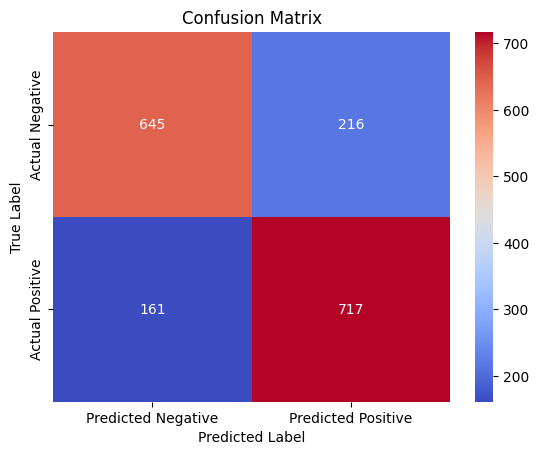

In [ ]:
cm = confusion_matrix(y_val, val_predictions)

accuracy_logreg = accuracy_score(y_val, val_predictions)
print(f"Accuracy Score Logistic Regression (Grid Search) : {accuracy_logreg}")

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Finding Intercept and Coefficents

In [ ]:
best_logreg.intercept_

array([-1.47638764])

In [ ]:
best_logreg.coef_

array([[ 1.27374619,  0.55776421,  1.35147734,  0.        , -0.43740211,
        -0.44704067, -0.10674431,  0.97353364,  2.10060689,  0.25851603,
        -0.23477742,  0.20799533, -0.12059209,  0.        ,  0.58384034,
        -0.10415021, -1.02314744,  0.83131724,  0.34564636, -2.27503062,
        -2.1829335 ]])

In [ ]:
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
feature_names

array(['cat__HomePlanet_Europa', 'cat__HomePlanet_Mars',
       'cat__CryoSleep_True', 'cat__Destination_Earth',
       'cat__Destination_PSO J318.5-22', 'cat__Destination_TRAPPIST-1e',
       'cat__VIP_True', 'cat__Deck_B', 'cat__Deck_C', 'cat__Deck_D',
       'cat__Deck_E', 'cat__Deck_F', 'cat__Deck_G', 'cat__Deck_T',
       'cat__Side_S', 'num__Age', 'num__RoomService', 'num__FoodCourt',
       'num__ShoppingMall', 'num__Spa', 'num__VRDeck'], dtype=object)

In [ ]:
summary_table = pd.DataFrame(columns=['Feature Name'], data = feature_names)
summary_table['Coefficient'] = np.transpose(best_logreg.coef_)
summary_table

,Feature Name,Coefficient
0,cat__HomePlanet_Europa,1.273746
1,cat__HomePlanet_Mars,0.557764
2,cat__CryoSleep_True,1.351477
3,cat__Destination_Earth,0.000000
4,cat__Destination_PSO J318.5-22,-0.437402
5,cat__Destination_TRAPPIST-1e,-0.447041
6,cat__VIP_True,-0.106744
7,cat__Deck_B,0.973534
8,cat__Deck_C,2.100607
9,cat__Deck_D,0.258516


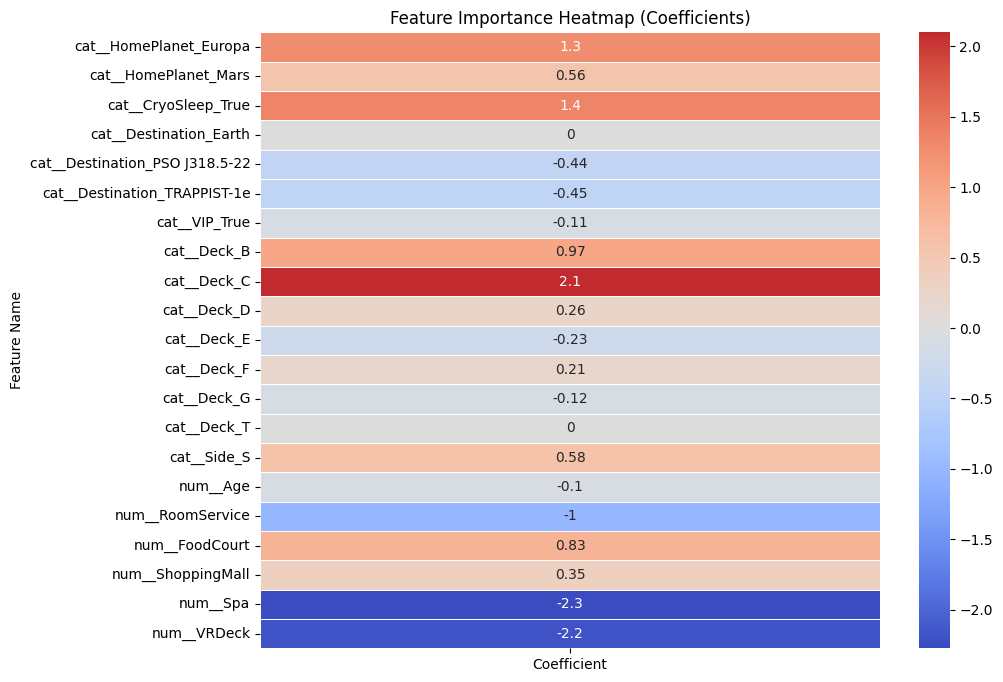

In [ ]:
summary_table.columns = ['Feature Name', 'Coefficient']
summary_table.set_index('Feature Name', inplace = True)

plt.figure(figsize=(10,8))
sns.heatmap(summary_table[['Coefficient']], annot=True, cmap='coolwarm',
            center=0, linewidths=0.5)
plt.title('Feature Importance Heatmap (Coefficients)')
plt.show()

In [ ]:
summary_table['Odds Ratio'] = np.exp(summary_table.Coefficient)
summary_table

,Coefficient,Odds Ratio
Feature Name,,
cat__HomePlanet_Europa,1.273746,3.574217
cat__HomePlanet_Mars,0.557764,1.746763
cat__CryoSleep_True,1.351477,3.863128
cat__Destination_Earth,0.000000,1.000000
cat__Destination_PSO J318.5-22,-0.437402,0.645712
cat__Destination_TRAPPIST-1e,-0.447041,0.639518
cat__VIP_True,-0.106744,0.898755
cat__Deck_B,0.973534,2.647282
cat__Deck_C,2.100607,8.171127


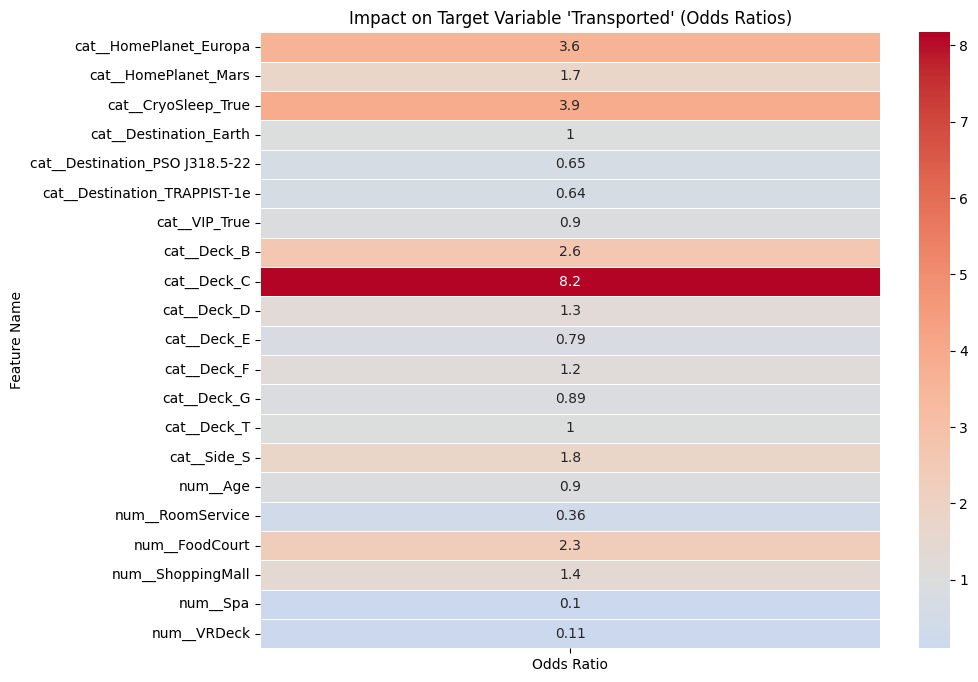

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(summary_table[['Odds Ratio']], annot=True, cmap="coolwarm", center=1, linewidths=0.5)
plt.title("Impact on Target Variable 'Transported' (Odds Ratios)")
plt.show()

The heatmap visualizes the impact of each feature on the probability of a passenger being transported, based on the logistic regression model's coefficients. By converting these coefficients into Odds Ratios (ORs), we get a more intuitive understanding of each feature's effect:

- **OR > 1:** A positive association with the target variable, meaning that as the feature's value increases, the likelihood of being transported also increases.

- **OR < 1:** A negative association, where a higher feature value decreases the likelihood of being transported.

- **OR ≈ 1:** Little to no impact on the target variable, indicating that the feature may be less relevant for predictions.

### Feature Engineering

The Model is not bad, but maybe it could get better if we take a closer look again into the features.

#### Onboard Spendings Column

Let's make a copy. So our orginal train_data and test_data stay the same.

In [ ]:
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

In [ ]:
train_data_copy['OnboardSpending'] = (train_data['RoomService'] +
                                  train_data['FoodCourt'] +
                                  train_data['ShoppingMall'] +
                                  train_data['Spa'] +
                                  train_data['VRDeck'])

test_data_copy['OnboardSpending'] = (train_data['RoomService'] +
                                  train_data['FoodCourt'] +
                                  train_data['ShoppingMall'] +
                                  train_data['Spa'] +
                                  train_data['VRDeck'])


In [ ]:
# train_data_copy = train_data_copy.drop(['RoomService', 'FoodCourt',
#                                         'ShoppingMall', 'Spa', 'VRDeck'], axis=1)

Dropping these columns made the model worse. (Accuracy was around 0.72)

In [ ]:
train_data_copy.columns.values

array(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Onboard_Spending',
       'VIP', 'Deck', 'Side', 'Transported', 'OnboardSpending'],
      dtype=object)

In [ ]:
column_order_train = ['HomePlanet', 'CryoSleep', 'Destination', 'Age',
                      'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
                      'OnboardSpending', 'VIP', 'Deck', 'Side', 'Transported']


train_data_copy = train_data_copy[column_order_train]

In [ ]:
test_data_copy.columns.values

array(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Deck',
       'Side', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'OnboardSpending'], dtype=object)

In [ ]:
column_order_test = ['HomePlanet', 'CryoSleep', 'Destination', 'Age',
                      'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
                      'OnboardSpending', 'VIP', 'Deck', 'Side']

test_data_copy = test_data_copy[column_order_test]

In [ ]:
train_data_copy.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,OnboardSpending,VIP,Deck,Side,Transported
0,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False,B,P,0
1,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,736.0,False,F,S,1
2,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0,True,A,S,0
3,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0,False,A,S,0
4,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,1091.0,False,F,S,1


In [ ]:
test_data_copy.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,OnboardSpending,VIP,Deck,Side
0,Earth,True,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,False,G,S
1,Earth,False,TRAPPIST-1e,19.0,0.0,9.0,0.0,2823.0,0.0,736.0,False,F,S
2,Europa,True,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,10383.0,False,C,S
3,Europa,False,TRAPPIST-1e,38.0,0.0,6652.0,0.0,181.0,585.0,5176.0,False,C,S
4,Earth,False,TRAPPIST-1e,20.0,10.0,0.0,635.0,0.0,0.0,1091.0,False,F,S


In [ ]:
numeric_features_new = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
                        'VRDeck', 'OnboardSpending']


preprocessor_new = ColumnTransformer(transformers=[('cat',
                                                    OneHotEncoder(drop='first'),
                                                    categorical_features),
                                               ('num', StandardScaler(),
                                               numeric_features_new)
],
                                       remainder='passthrough'
)

pipeline_new = Pipeline(steps=[('preprocessor', preprocessor_new)])

X_copy = train_data_copy.iloc[:, :-1]

train_data_copy_transformed = pipeline_new.fit_transform(X_copy)
test_data_copy_transformed = pipeline_new.transform(test_data_copy)

In [ ]:
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(
    train_data_copy_transformed, y, train_size=0.8, random_state=42
)

#### Logistic Regression with new Feature

In [ ]:
grid_search.fit(X_train_new, y_train_new)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7960911098583391


In [ ]:
best_logreg_new = grid_search.best_estimator_

val_predictions_new = best_logreg_new.predict(X_val_new)

accuracy_logreg_new = accuracy_score(y_val_new, val_predictions_new)
print('Accuracy Logistic Regression with OnboardSpending:', accuracy_logreg_new)

Accuracy Logistic Regression with OnboardSpending: 0.7832087406555491


So the accuracy did not change with the OnboardSpending Variable.

#### Feature Selection

Based on the summary table above I'm going to remove a few features which may  not valuable for the target 'Transported'.

In [ ]:
train_data_selected = train_data.copy()
test_data_selected = test_data.copy()

In [ ]:
train_data_selected

,HomePlanet,CryoSleep,Destination,Age,VIP,Deck,Side,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,B,P,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,TRAPPIST-1e,24.0,False,F,S,109.0,9.0,25.0,549.0,44.0,1
2,Europa,False,TRAPPIST-1e,58.0,True,A,S,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,False,TRAPPIST-1e,33.0,False,A,S,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,False,TRAPPIST-1e,16.0,False,F,S,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,A,P,0.0,6819.0,0.0,1643.0,74.0,0
8689,Earth,True,PSO J318.5-22,18.0,False,G,S,0.0,0.0,0.0,0.0,0.0,0
8690,Earth,False,TRAPPIST-1e,26.0,False,G,S,0.0,0.0,1872.0,1.0,0.0,1
8691,Europa,False,55 Cancri e,32.0,False,E,S,0.0,1049.0,0.0,353.0,3235.0,0


In [ ]:
features_to_drop = ['Destination', 'VIP', 'Deck', 'Age']

train_data_selected = train_data_selected.drop(features_to_drop, axis = 1)
test_data_selected = test_data_selected.drop(features_to_drop, axis = 1)


categorical_features_selected = ['HomePlanet', 'CryoSleep', 'Side']
numeric_features_selected = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


preprocessor_selected = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features_selected),
        ('num', StandardScaler(), numeric_features_selected)
    ],
    remainder='passthrough'
)


pipeline_selected = Pipeline(steps=[('preprocessor', preprocessor_selected)])


X_selected = train_data_selected.iloc[:, :-1]
y_selected = train_data_selected.iloc[:, -1]
train_data_transformed_selected = pipeline_selected.fit_transform(X_selected)

In [ ]:
X_train_selected, X_val_selected, y_train_selected, y_val_selected = train_test_split(
    train_data_transformed_selected, y_selected, train_size=0.8, random_state=42
)

In [ ]:
grid_search.fit(X_train_selected, y_train_selected)

print("Best Parameters with Selected Features:", grid_search.best_params_)
print("Best Cross-Validation Accuracy with Selected Features:", grid_search.best_score_)

Best Parameters with Selected Features: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy with Selected Features: 0.7940769282489177


In [ ]:
val_predictions_selected = grid_search.best_estimator_.predict(X_val_selected)

accuracy_selected = accuracy_score(y_val_selected, val_predictions_selected)
print('Accuracy Logistic Regression with selected Features:', accuracy_selected)

Accuracy Logistic Regression with selected Features: 0.7768832662449684


## XGBoost Model

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(silent=1)

In [ ]:
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:09:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_model.score(X_train, y_train)

0.9048029910842681

In [ ]:
xgb_predictions = xgb_model.predict(X_val)

accuarcy_xgb_basic = accuracy_score(y_val, xgb_predictions)
print('Accuracy XGB (Basic):', accuracy_selected)

Accuracy XGB (Basic): 0.7768832662449684


### Grid Search XGB

In [ ]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

In [ ]:
grid_search_xgb = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False,
                                                           eval_metric='logloss',),
                               param_grid = param_grid_xgb,
                               scoring='accuracy',
                               cv=5)

grid_search_xgb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:09:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:09:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:09:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:09:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:09:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [ ]:
print("Best Parameters (XGBoost + Grid Search):", grid_search_xgb.best_params_)
print("Best Cross-Validation Accuracy (XGBoost + Grid Search):", grid_search_xgb.best_score_)

Best Parameters (XGBoost + Grid Search): {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
Best Cross-Validation Accuracy (XGBoost + Grid Search): 0.8124820919684094


In [ ]:
best_xgb = grid_search_xgb.best_estimator_

xgb_predictions_grid = best_xgb.predict(X_val)
accuracy_xgb = accuracy_score(y_val, xgb_predictions_grid)

print('Accuracy XGB (Grid Search):', accuracy_selected)

Accuracy XGB (Grid Search): 0.7768832662449684


### XGB with OnboardSpening

In [ ]:
grid_search_xgb.fit(X_train_new, y_train_new)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:11:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:11:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:11:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:11:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:11:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [ ]:
best_xgb_new = grid_search_xgb.best_estimator_

xgb_pred_new = best_xgb_new.predict(X_val_new)

accuracy_xgb_new = accuracy_score(y_val_new, xgb_pred_new )

print('Accuracy XGB with OnboardSpending:', accuracy_xgb_new)

Accuracy XGB with OnboardSpending: 0.7901092581943646


### XGB with Selected Features

In [ ]:
best_xgb_selected = grid_search_xgb.fit(X_train_selected, y_train_selected)

xgb_pred_selected = best_xgb_selected.predict(X_val_selected)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:17:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:17:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:17:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:17:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:17:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [ ]:
accuracy_xgb_selected = accuracy_score(y_val_selected, xgb_pred_selected )

print('Accuracy XGB with selected Features:', accuracy_xgb_selected)

Accuracy XGB with selected Features: 0.7763082231167338


# **Accuricies Overview**

In [ ]:
accuracy_data = {
    'Model': [
        'Logistic Regression (Basic)',
        'Logistic Regression (Grid Search)',
        'Logistic Regression (OnboardSpending)',
        'Logistic Regression (Feature Selection)',
        'XGBoost (Basic)',
        'XGBoost (Grid Search)',
        'XGBoost (OnboardSpending)',
        'XGBoost (Feature Selection)'
    ],
    'Accuracy Validation Set': [
        accuracy_base_model,  # Base Logistic Regression accuracy
        accuracy_logreg,  # Logistic Regression with Grid Search accuracy
        accuracy_logreg_new,   # Logistic Regression with OnboardSpending + Grid Search
        accuracy_selected,   # Logistic Regression with Feature Selection + Grid Search
        accuarcy_xgb_basic,
        accuracy_xgb,
        accuracy_xgb_new,
        accuracy_xgb_selected
    ]
}

In [ ]:
accuracy_df = pd.DataFrame(accuracy_data)
display(accuracy_df)

,Model,Accuracy Validation Set
0,Logistic Regression (Basic),0.782059
1,Logistic Regression (Grid Search),0.783209
2,Logistic Regression (OnboardSpending),0.783209
3,Logistic Regression (Feature Selection),0.776883
4,XGBoost (Basic),0.787234
5,XGBoost (Grid Search),0.788959
6,XGBoost (OnboardSpending),0.790109
7,XGBoost (Feature Selection),0.776308


**Logistic Regression (Basic)** – Accuracy: 0.782

- The baseline logistic regression model achieves an accuracy of 78.2%. This serves as a benchmark for further improvements.

**Logistic Regression (Grid Search)** – Accuracy: 0.783

- After applying Grid Search to tune hyperparameters, the logistic regression model slightly improves to 78.3% accuracy, showing minimal gain from hyperparameter optimization.

**Logistic Regression (OnboardSpending)** – Accuracy: 0.783

- Adding the OnboardSpending feature to the logistic regression model provides no significant improvement, maintaining an accuracy of 78.3%.

**Logistic Regression (Feature Selection)** – Accuracy: 0.777

- Removing less influential features, based on earlier analysis, results in a small decrease in accuracy to 77.7%. This suggests that some dropped features may have contributed useful information for logistic regression.

**XGBoost (Basic)** – Accuracy: 0.787

- The basic XGBoost model starts with a higher accuracy than logistic regression, reaching 78.7%. This indicates that XGBoost captures more complex patterns in the data.

**XGBoost (Grid Search)** – Accuracy: 0.789

- Applying Grid Search for hyperparameter tuning improves the accuracy of XGBoost to 78.9%, showing that tuning can enhance its performance.

**XGBoost (OnboardSpending)** – Accuracy: 0.790

- Adding the OnboardSpending feature further improves XGBoost’s performance to 79.0%, indicating that this feature contributes valuable information in this context.

**XGBoost (Feature Selection)** – Accuracy: 0.776

- Similar to logistic regression, removing selected features results in a decrease in accuracy to 77.6%, suggesting that these features, although seemingly less influential, still add predictive value for XGBoost.

**Summary**

XGBoost consistently outperforms logistic regression in this dataset, with the best accuracy (79.0%) achieved by including the OnboardSpending feature.
Feature selection slightly reduced accuracy for both models, indicating that some of the removed features may contribute useful information.
Grid Search shows a modest improvement in both models but is more effective in boosting XGBoost than logistic regression.
Overall, XGBoost with the OnboardSpending feature and tuned hyperparameters offers the best model accuracy on the validation set.